In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


We need to check if there are still **Null data** in our dataset or no. If any we have to clean it, we there are no **Null**, then we can go to the analysys.

In [4]:
null_values = df.isnull()
null_counts = null_values.sum()

In [5]:
null_counts

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

We don't have any **Null data**, so we can consider our data is **cleaned** already. So we can move to the analysys part without data cleaning part needed.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

In [8]:
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Person ID':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 2

In [9]:
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop(
    'Blood Pressure', axis=1)

In [10]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [11]:
df1=df1.rename(columns={0: 'Systolic Blood Pressure', 1: 'Diastolic Blood Pressure'})

In [12]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

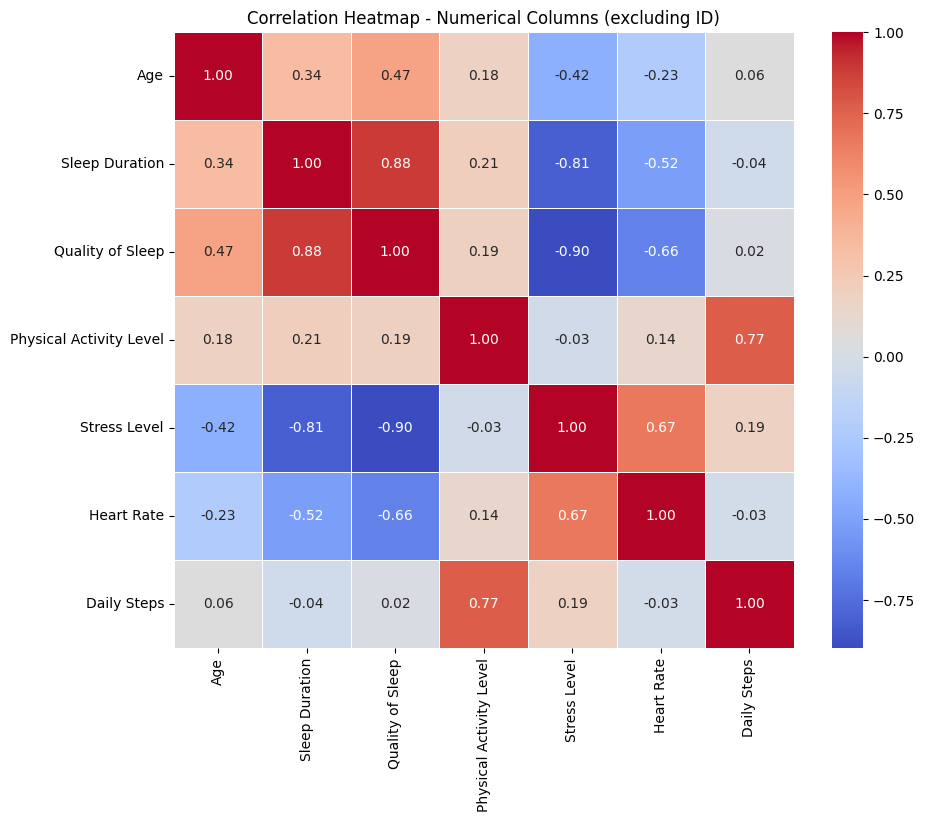

In [14]:
df_without_id = df.drop("Person ID", axis=1)
numerical_columns = df_without_id.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Columns (excluding ID)")
plt.show()

By using the heatmap above, we can only see the colleration between each coloumns that contain **integer or float** data types. We can see that blood pressure contains **object** data type. We can split the blood pressure to Systolic and Diastolic and change the data type to integer in order to include it into the heatmap. 

In [15]:
df1['Systolic Blood Pressure'] = df1['Systolic Blood Pressure'].astype(float)
df1['Diastolic Blood Pressure'] = df1['Diastolic Blood Pressure'].astype(float)

In [16]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0


In [17]:
df1.to_csv('raw_data.csv', index=False)
#saved the new table to computer

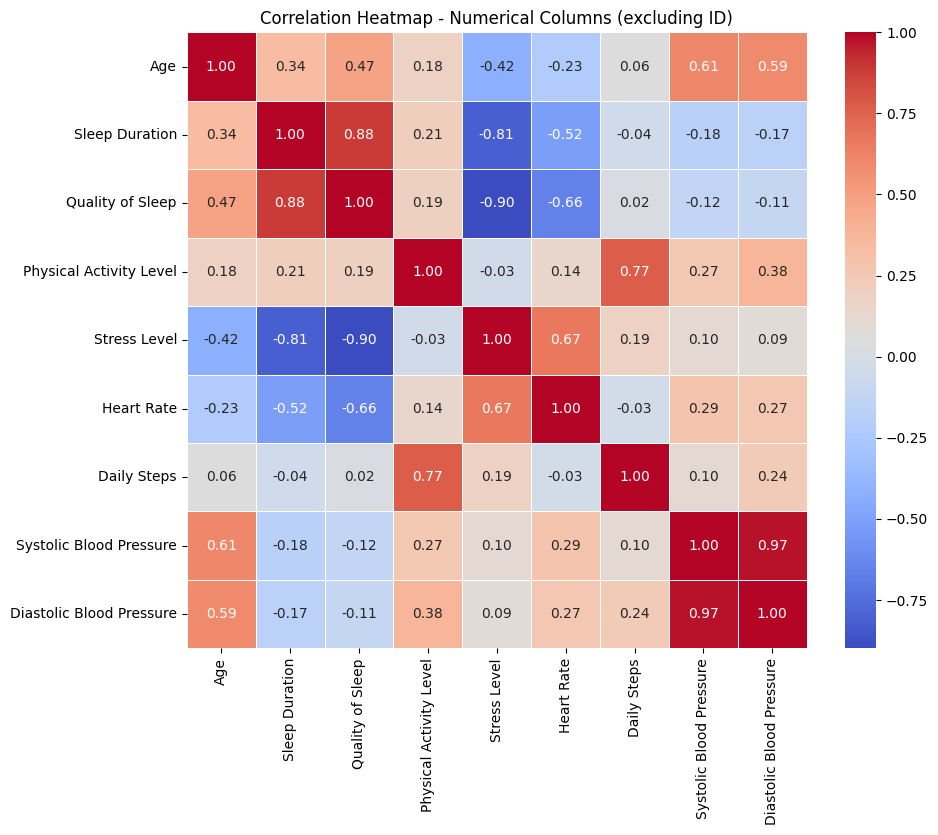

In [18]:
df1_without_id = df1.drop("Person ID", axis=1)
numerical_columns = df1_without_id.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Columns (excluding ID)")
plt.show()

For the categorical variables, we can see our data distributions regarding **Gender**, **Occupation**, **BMI Category**, and **Sleep Disorder**.

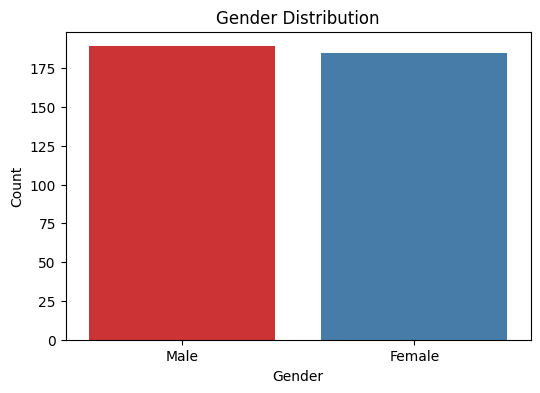

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df1, palette = 'Set1')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

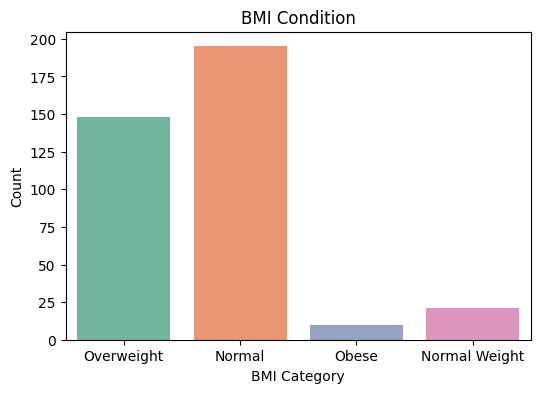

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='BMI Category', data=df1, palette = 'Set2')
plt.title("BMI Condition")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

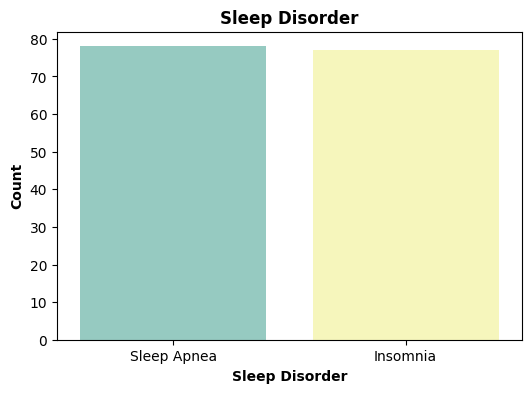

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sleep Disorder', data=df1, palette = 'Set3')
plt.title("Sleep Disorder", fontweight='bold')
plt.xlabel("Sleep Disorder", fontdict={'weight': 'semibold'})
plt.ylabel("Count", fontdict={'weight': 'semibold'})
plt.show()

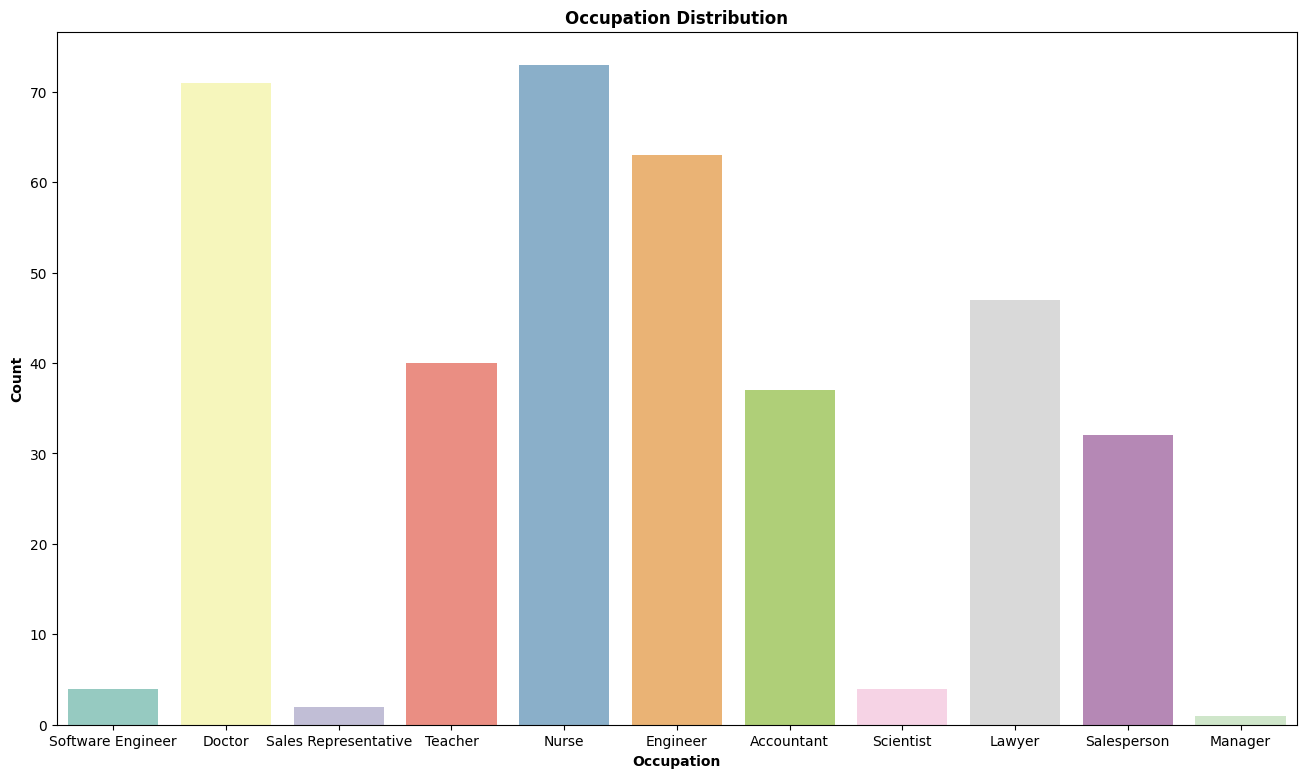

In [22]:
plt.figure(figsize=(16, 9))
sns.countplot(x='Occupation', data=df1, palette = 'Set3')
plt.title("Occupation Distribution", fontweight='bold')
plt.xlabel("Occupation", fontdict={'weight': 'semibold'})
plt.ylabel("Count", fontdict={'weight': 'semibold'})
plt.show()

We can use histplot to see the colleration between the metrics and dimension.

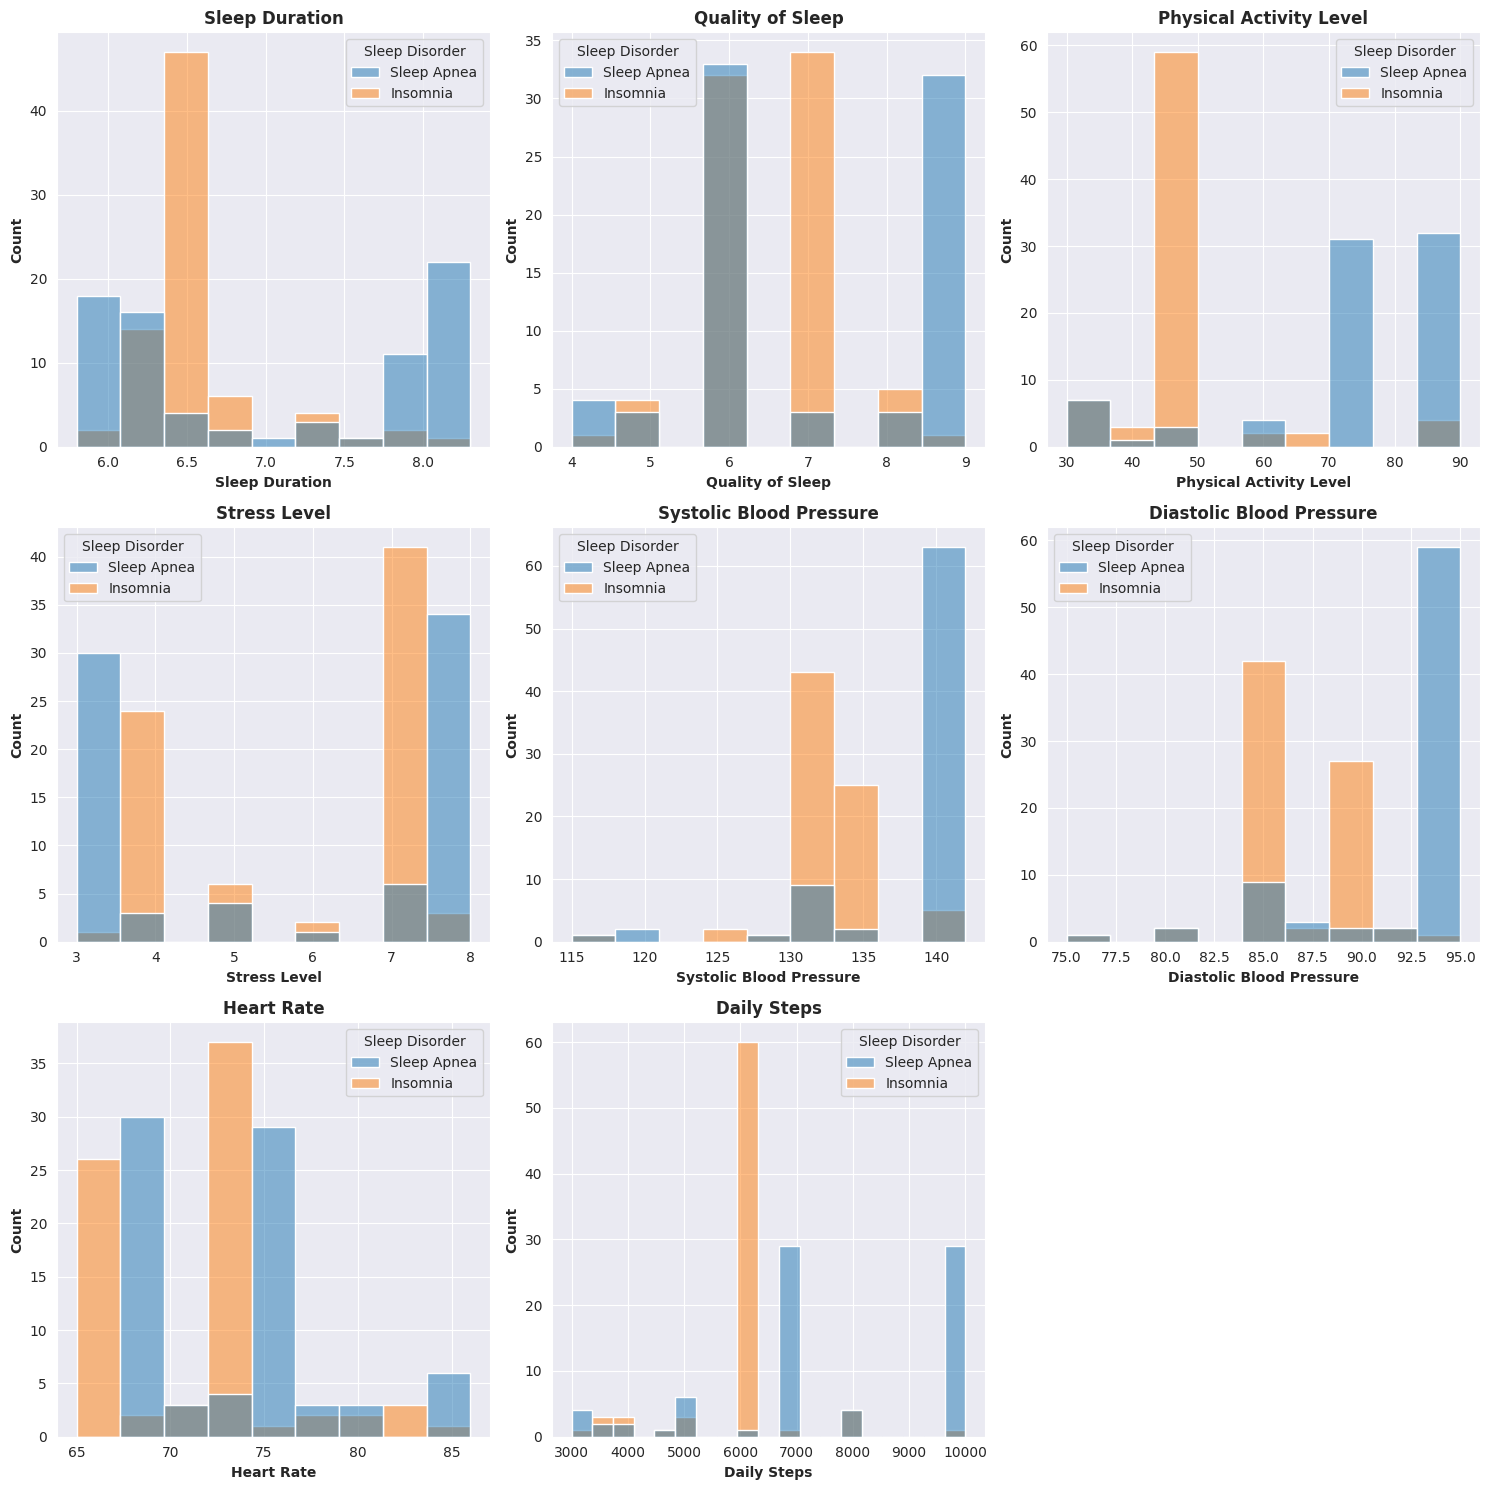

In [23]:
sns.set_style("darkgrid")

num_col = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate', 'Daily Steps']

fig = plt.figure(figsize=(15, 15))

for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)
    plt.title(num_col[i], fontweight='bold')
    sns.histplot(data=df1, x=num_col[i], hue='Sleep Disorder')
    plt.xlabel(num_col[i], fontweight='bold')
    plt.ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

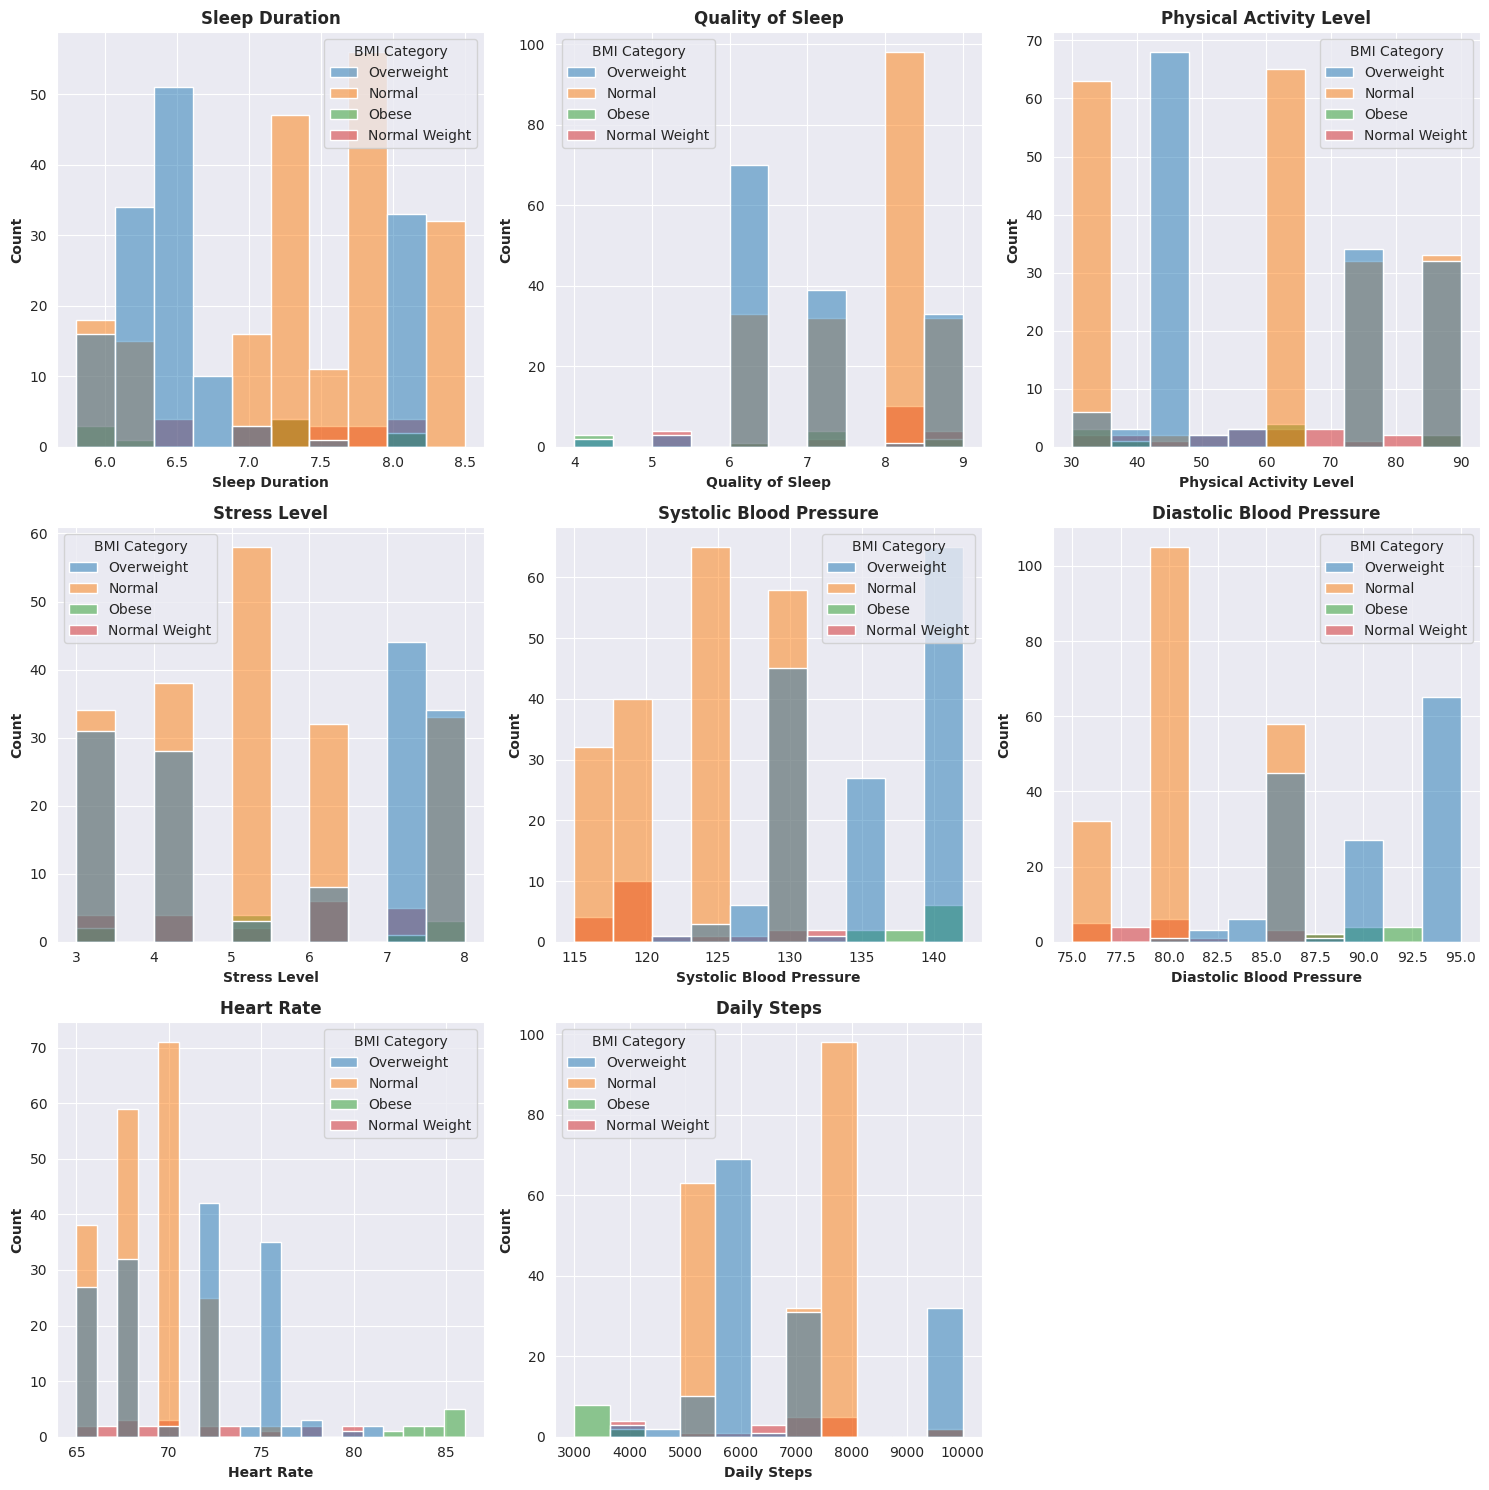

In [24]:
sns.set_style("darkgrid")

num_col = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate', 'Daily Steps']

fig = plt.figure(figsize=(15, 15))

for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)
    plt.title(num_col[i], fontweight='bold')
    sns.histplot(data=df1, x=num_col[i], hue='BMI Category')
    plt.xlabel(num_col[i], fontweight='bold')
    plt.ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

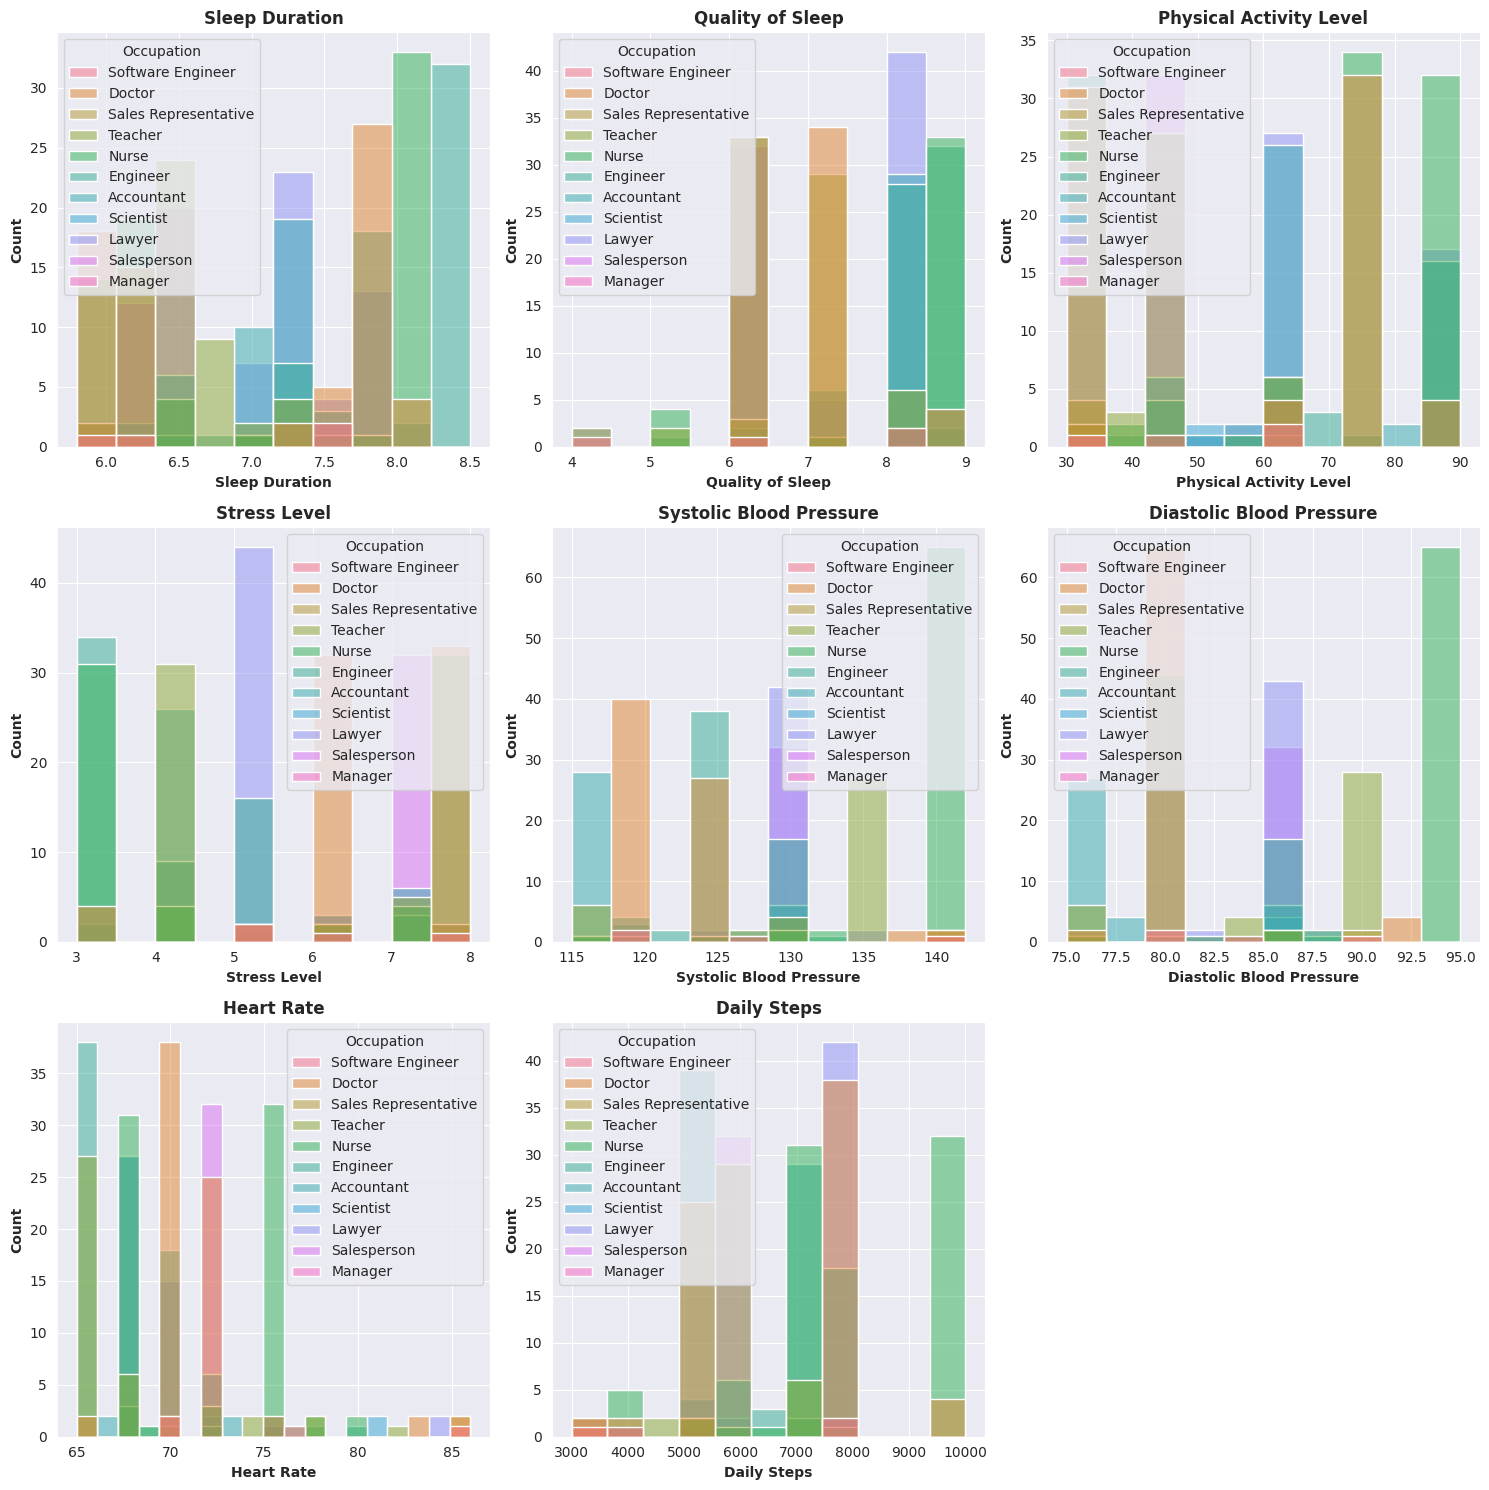

In [25]:
sns.set_style("darkgrid")

num_col = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate', 'Daily Steps']

fig = plt.figure(figsize=(15, 15))

for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)
    plt.title(num_col[i], fontweight='bold')
    sns.histplot(data=df1, x=num_col[i], hue='Occupation')
    plt.xlabel(num_col[i], fontweight='bold')
    plt.ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

Then, we need to check if there is any outlier in our data that we need to deal with.

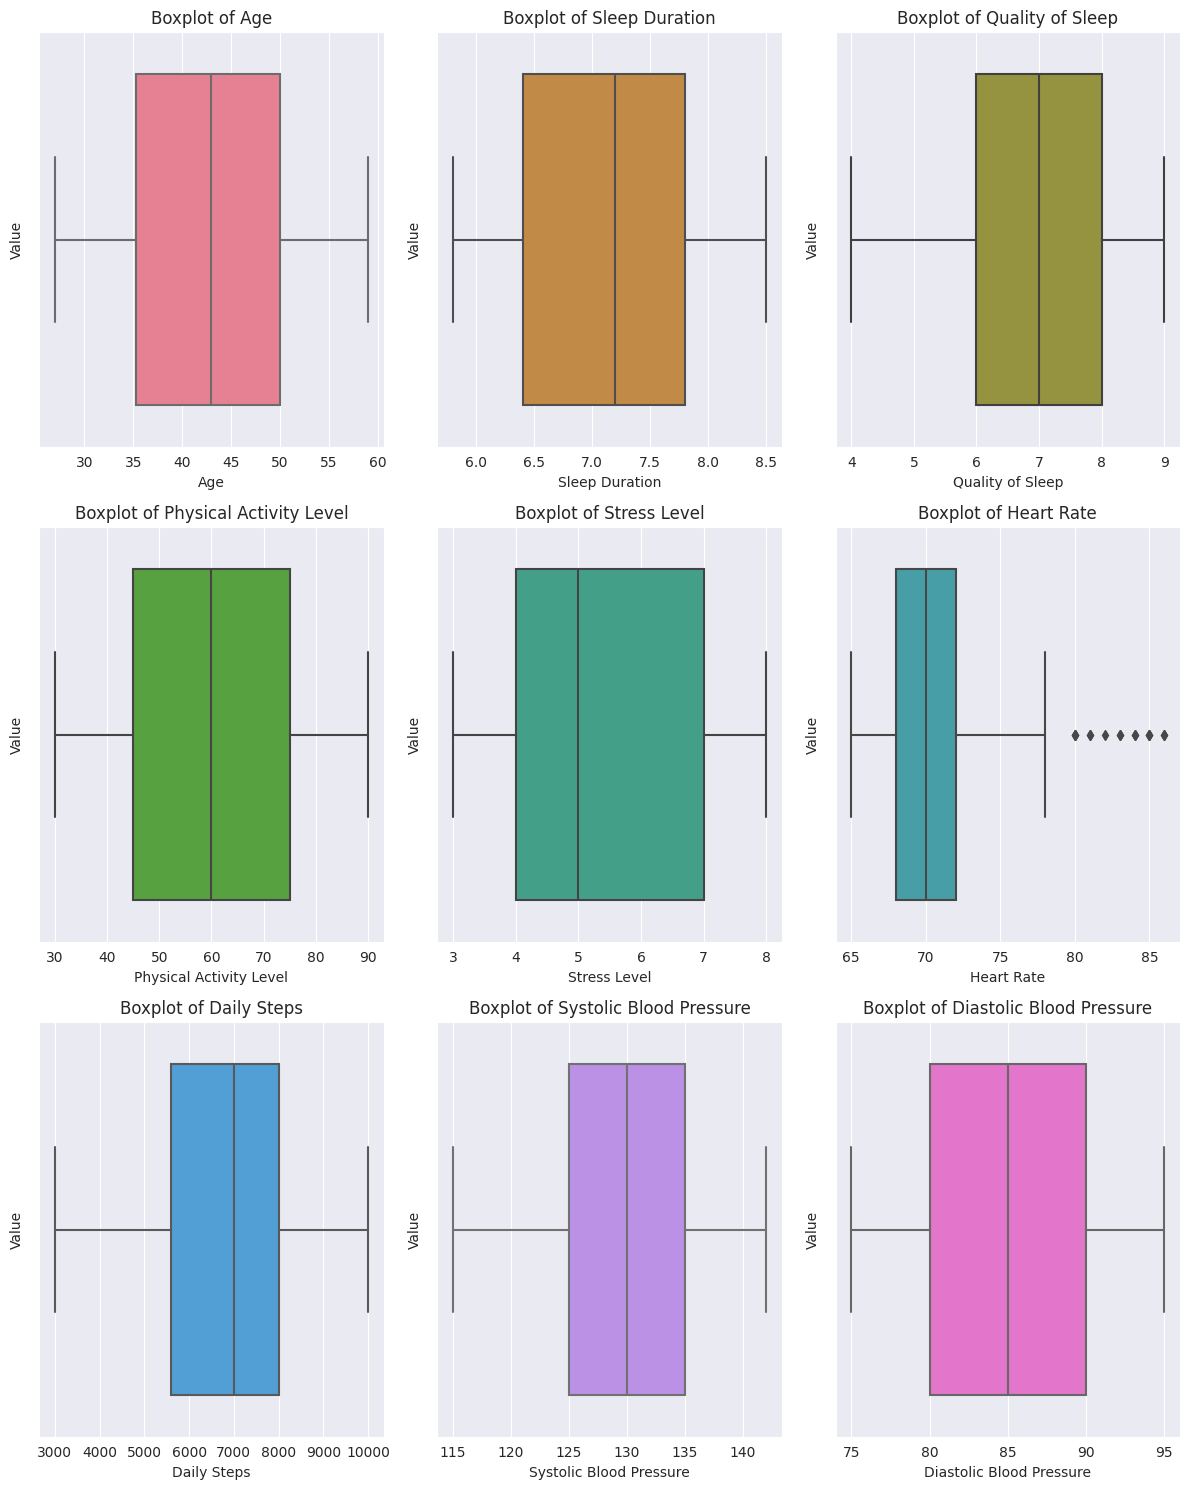

In [26]:
sns.set_style("darkgrid")

numerical_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                     'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 
                     'Diastolic Blood Pressure']

colors = sns.color_palette('husl', n_colors=len(numerical_columns))

plt.figure(figsize=(12, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, data=df1, color=colors[i-1])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

We can see that there is outlier in Heart Rate, but I don't think it is necessery to take a deal with that since we need those data in future analysys.

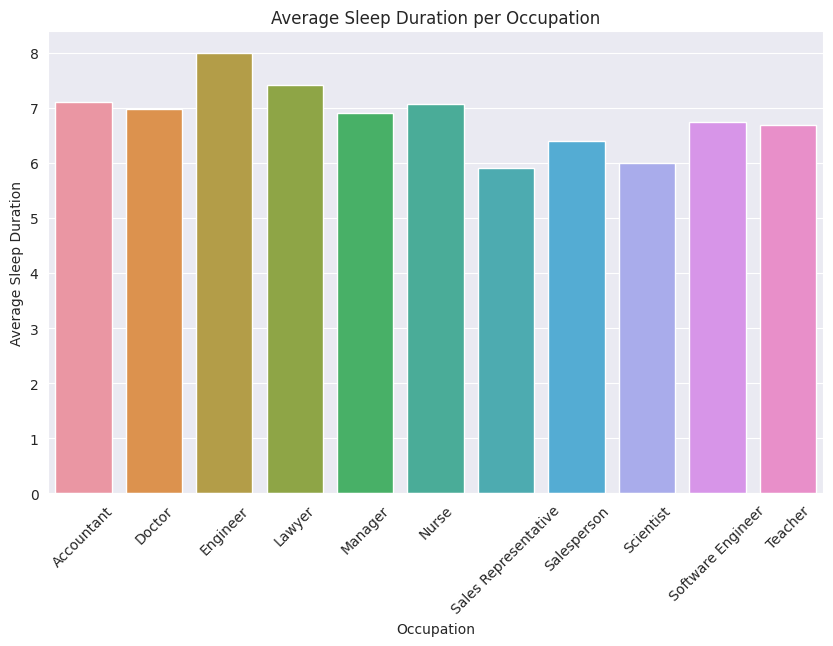

In [27]:
average_sleep_duration_per_occupation = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Sleep Duration', data=average_sleep_duration_per_occupation)
plt.title("Average Sleep Duration per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Sleep Duration")
plt.xticks(rotation=45)
plt.show()

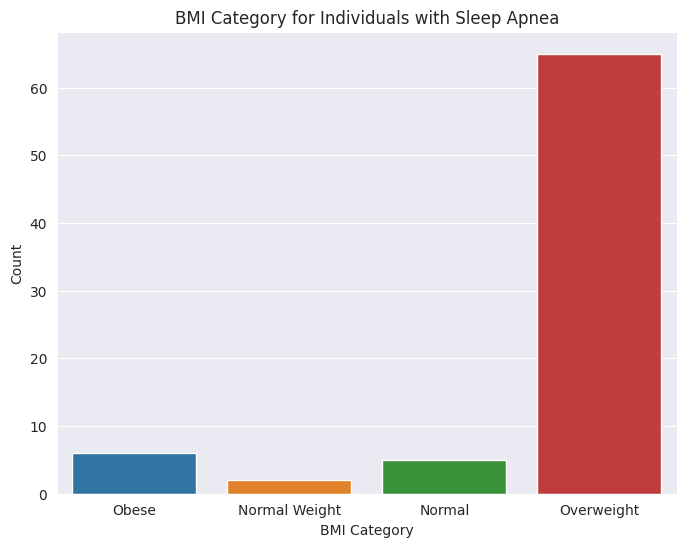

In [28]:
sleep_apnea_df = df[df['Sleep Disorder'] == 'Sleep Apnea']

plt.figure(figsize=(8, 6))
sns.countplot(x='BMI Category', data=sleep_apnea_df)
plt.title("BMI Category for Individuals with Sleep Apnea")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

You can see from the chart above, that mostly people with sleep apnea have overweight BMI category.

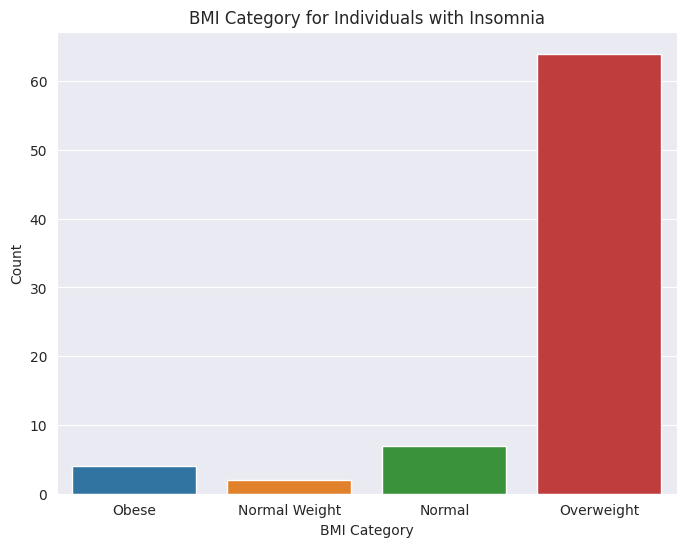

In [29]:
sleep_apnea_df = df[df['Sleep Disorder'] == 'Insomnia']

plt.figure(figsize=(8, 6))
sns.countplot(x='BMI Category', data=sleep_apnea_df)
plt.title("BMI Category for Individuals with Insomnia")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

Again, people with overweight is most likely have Insomnia.

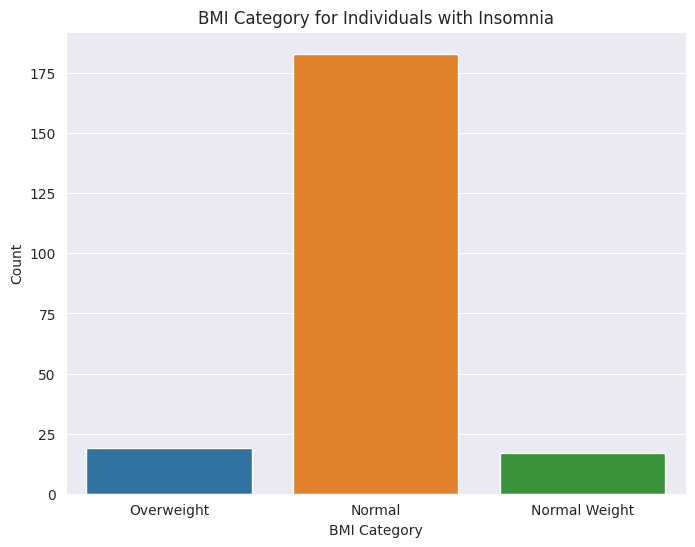

In [30]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

sleep_apnea_df = df[df['Sleep Disorder'] == 'None']

plt.figure(figsize=(8, 6))
sns.countplot(x='BMI Category', data=sleep_apnea_df)
plt.title("BMI Category for Individuals with Insomnia")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

That's it! People with Normal weight, mostly have no problem with their sleep.

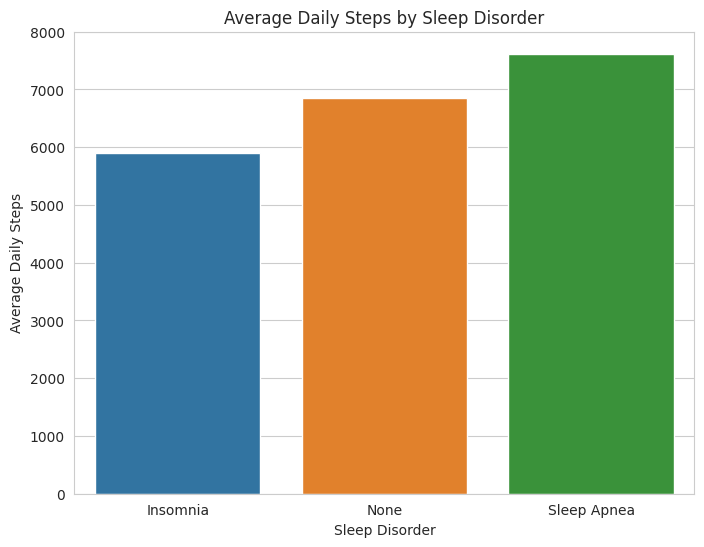

In [31]:
sns.set_style("whitegrid")

average_daily_steps = df.groupby('Sleep Disorder')['Daily Steps'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Daily Steps', data=average_daily_steps)
plt.title("Average Daily Steps by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Daily Steps")
plt.show()

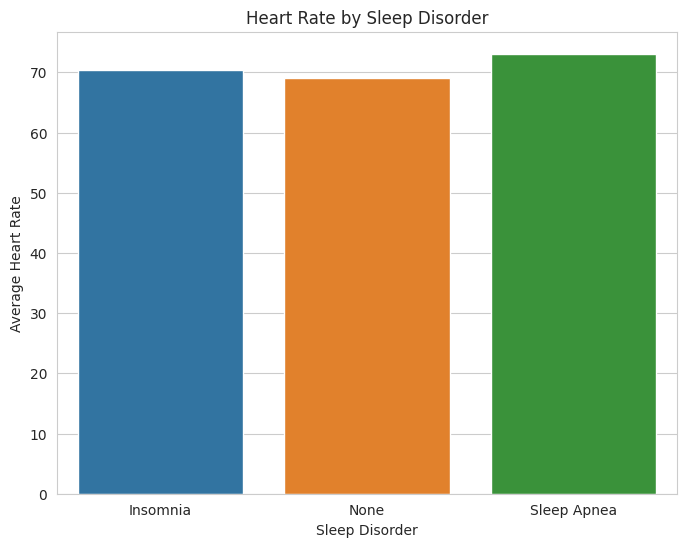

In [32]:
sns.set_style("whitegrid")

average_daily_steps = df.groupby('Sleep Disorder')['Heart Rate'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Heart Rate', data=average_daily_steps)
plt.title("Heart Rate by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Heart Rate")
plt.show()

People with none sleep disorder mostly have lower avarage heart rate.

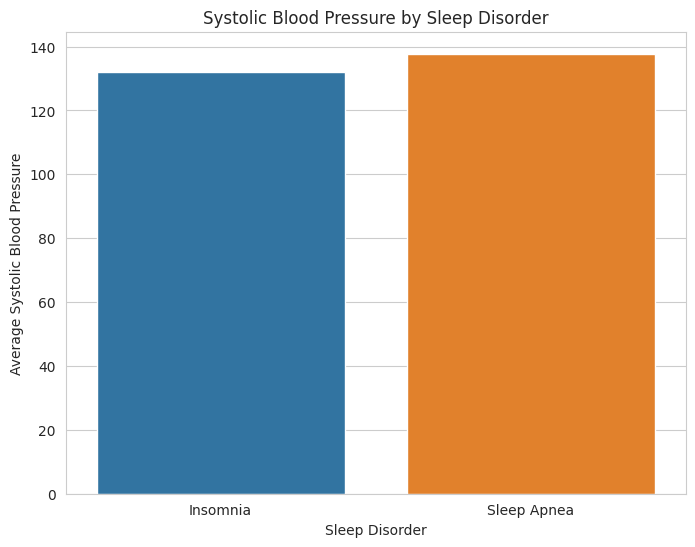

In [33]:
sns.set_style("whitegrid")

average_daily_steps = df1.groupby('Sleep Disorder')['Systolic Blood Pressure'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Systolic Blood Pressure', data=average_daily_steps)
plt.title("Systolic Blood Pressure by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Systolic Blood Pressure")
plt.show()

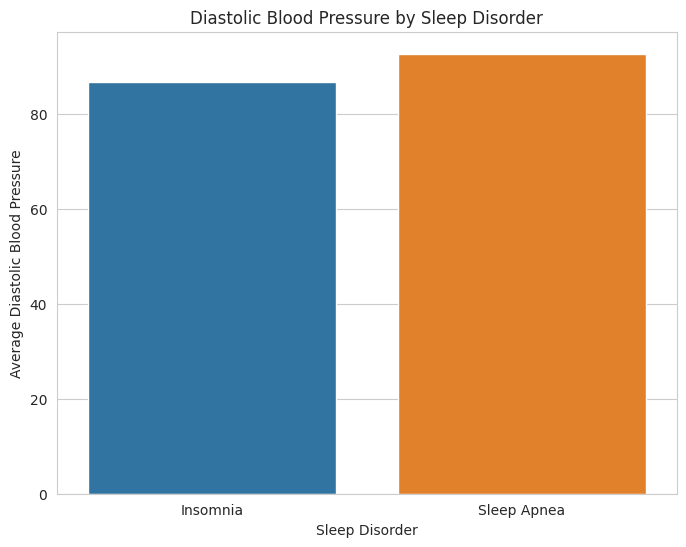

In [34]:
sns.set_style("whitegrid")

average_daily_steps = df1.groupby('Sleep Disorder')['Diastolic Blood Pressure'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Diastolic Blood Pressure', data=average_daily_steps)
plt.title("Diastolic Blood Pressure by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Diastolic Blood Pressure")
plt.show()

People with none sleep disorder have lower blood pressure either in systolic or diastolic. Meanwhile people with sleep apnea have higher blood pressure.

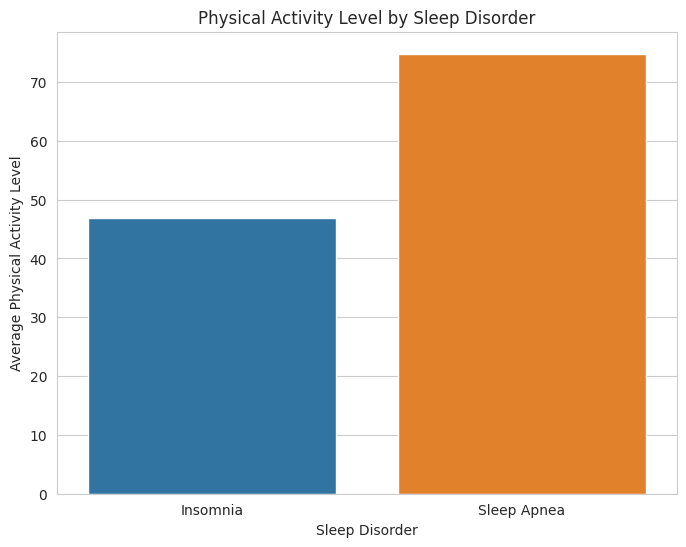

In [35]:
sns.set_style("whitegrid")

average_daily_steps = df1.groupby('Sleep Disorder')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Physical Activity Level', data=average_daily_steps)
plt.title("Physical Activity Level by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Physical Activity Level")
plt.show()

Surprisingly, people with lowest activity level has a problem with insomnia and the highest have a problem with sleep apnea. It means that we have to have an activity in our daily lifes but not too much or not too little.

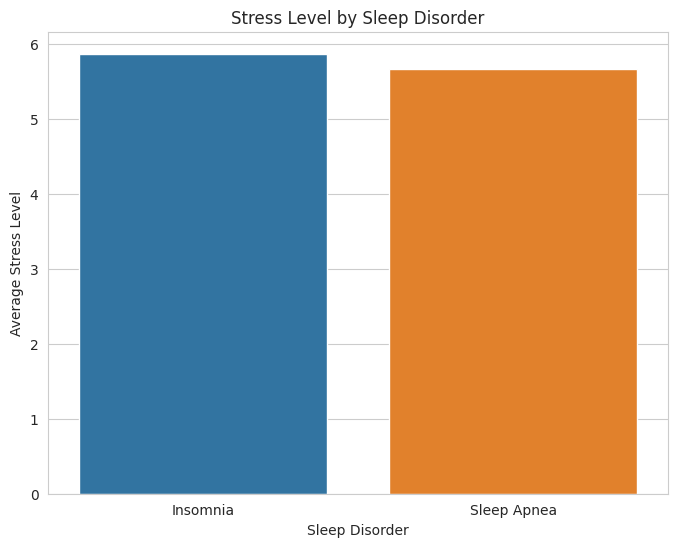

In [36]:
sns.set_style("whitegrid")

average_daily_steps = df1.groupby('Sleep Disorder')['Stress Level'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Stress Level', data=average_daily_steps)
plt.title("Stress Level by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Stress Level")
plt.show()

This is why people have insomnia, stress can make us difficult to sleep and likely have sleep apnea. People with no problem with sleep have the lowest avg stress level.

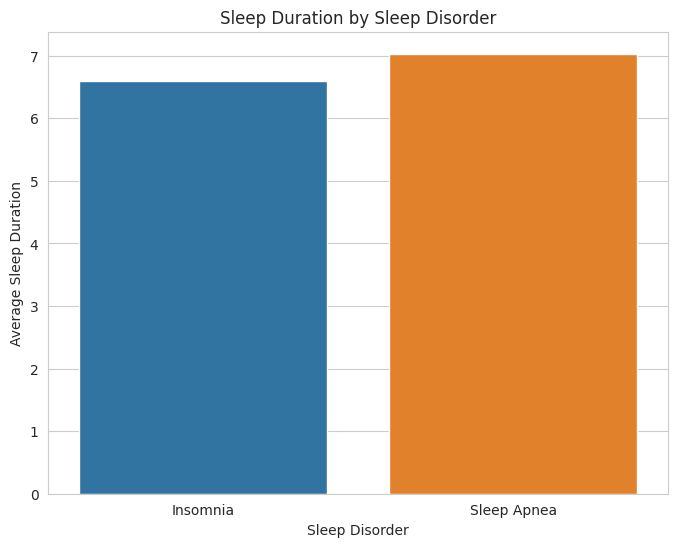

In [37]:
sns.set_style("whitegrid")

average_daily_steps = df1.groupby('Sleep Disorder')['Sleep Duration'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Sleep Duration', data=average_daily_steps)
plt.title("Sleep Duration by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Sleep Duration") 
plt.show()

Of course, people with none sleep disorder will sleep comfortably and longest that people that have problem with their sleep.

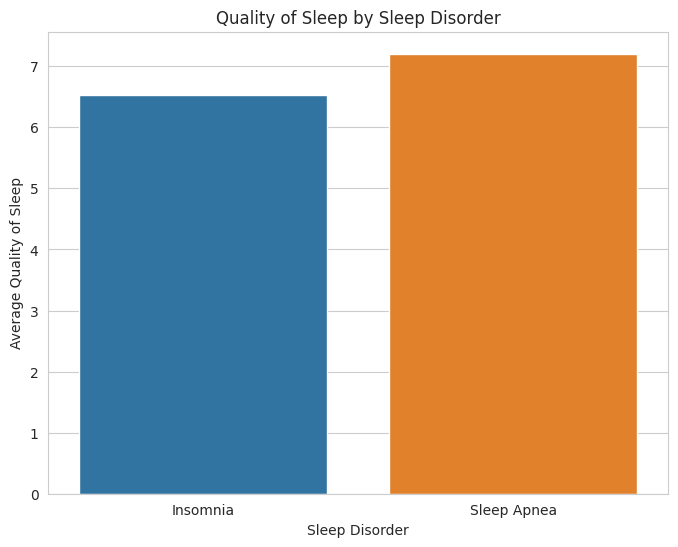

In [38]:
sns.set_style("whitegrid")

average_daily_steps = df1.groupby('Sleep Disorder')['Quality of Sleep'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Quality of Sleep', data=average_daily_steps)
plt.title("Quality of Sleep by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Quality of Sleep") 
plt.show()

Not surprised! The data is the same with sleep duration.

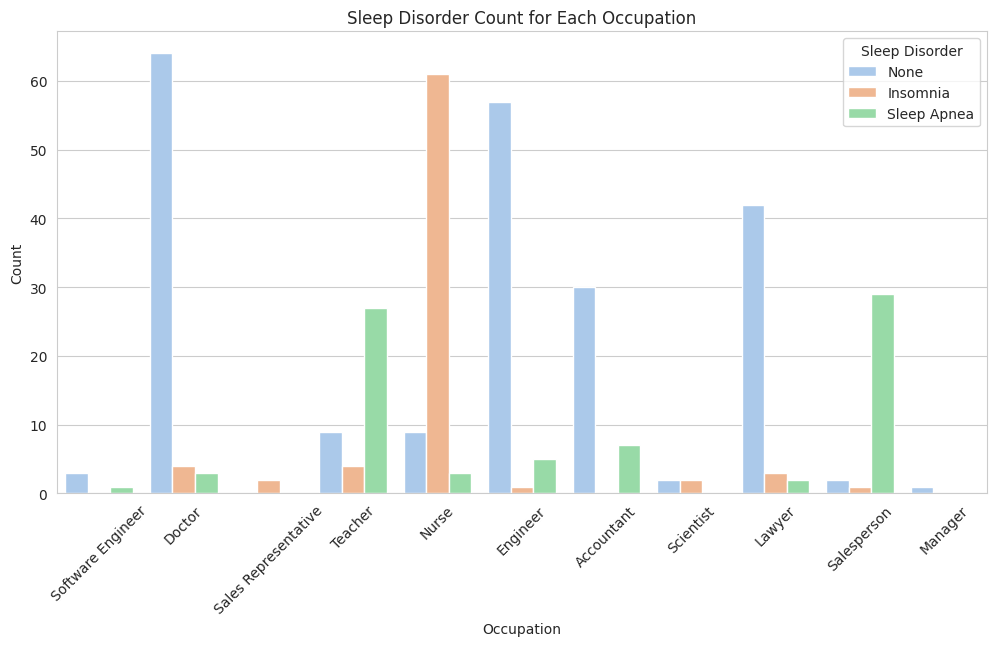

In [39]:
sns.set_style("whitegrid")

# Assuming you have already loaded the dataset into the DataFrame df
# and the columns are named "Occupation" and "Sleep Disorder"

# Create a count plot for the sleep disorder categories for each occupation
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Sleep Disorder', data=df, palette='pastel')
plt.title("Sleep Disorder Count for Each Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder', loc='upper right', labels=['None', 'Insomnia', 'Sleep Apnea'])
plt.show()

Occupation has the highest Insomnia proble is Nurse. While the Sleep Apnea one is Salesperson. Occupation with the most no problem with their sleep is Doctor.

Data visualization can be seen [here](https://lookerstudio.google.com/reporting/a78d5219-bf24-4e33-822d-d0ff65559f21).

Explanation of data visualization can be seen [here](https://docs.google.com/document/d/1g_9qEuvuczykt4sGb1jGneaASpaMKq_S/edit?usp=sharing&ouid=109788345461162371394&rtpof=true&sd=true).